颜色显然比图形风格的其他方面都更加重要，因为颜色使用得当就可以有效显示或隐藏数据中的特征。有许多的好资源都可以了解关于在可视化中使用颜色的技巧，推荐Rob Simmon的《series of blog posts》和这篇进阶的技术文章,matplotlib文档现在也有一个很好的教程，说明了如何在内置色彩映射中构建的一些感知特性。

Seaborn让你更容易选择和使用那些适合你数据和视觉的颜色。

In [5]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={"figure.figsize": (6, 6)})

#有什么用？
#np.random.seed(sum(map(ord, "palettes")))

# 通过color_palette()创建调色板

最重要的直接设置调色板的函数就是color_palette()。这个函数提供了许多（并非所有）在seaborn内生成颜色的方式。并且它可以用于任何函数内部的palette参数设置（在某些情况下当需要多种颜色时也可以传入到color参数）

color_palette()允许任意的seaborn调色板或matplotlib的颜色映射（除了jet，你应该完全不使用它）。它还可以使用任何有效的matplotlib格式指定的颜色列表(RGB元组、十六进制颜色代码或HTML颜色名称)。返回值总是一个RGB元组的列表。

最后，直接调用没有传入参数的color_palette()将返回默认的颜色循环。

对应的函数set_palette()接受相同的参数，并为所有图设置默认的颜色循环。你也可以在with块中使用color_palette()来实现临时的更改调色板配置（下面有详细例子）。

通常在不知道数据的具体特征的情况下不可能知道什么类型的调色板或颜色映射对于一组数据来说是最好的。因此，我们将用三种不同类型的调色板：分类色板、连续色板和离散色板，来区分和使用color_palette()函数。

# 分类色板

分类色板（定性）是在区分没有固定顺序的数据时最好的选择。

在导入seaborn库后，默认的颜色循环被更改为一组六种颜色。虽然这些颜色可能会让你想起matplotlib的标准颜色循环，但他们无疑更赏心悦目一些。

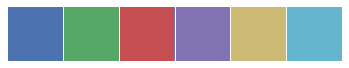

In [6]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

默认颜色主题共有六种不同的变化分别是：deep, muted, pastel, bright, dark, 和 colorblind。类似下面的方式直接传入即可。

In [ ]:
current_palette = sns.color_palette("dark") # 直接传入对应的参数即可变化
sns.palplot(current_palette)

# 使用圆形颜色系统

当你有六个以上的分类要区分时，最简单的方法就是在一个圆形的颜色空间中画出均匀间隔的颜色(这样的色调会保持亮度和饱和度不变)。这是大多数的当他们需要使用比当前默认颜色循环中设置的颜色更多时的默认方案。

最常用的方法是使用hls的颜色空间，这是RGB值的一个简单转换。

In [ ]:
sns.palplot(sns.color_palette("hls", 8))

当然，也可以使用hls_palette()函数来控制颜色的亮度和饱和。

In [ ]:
sns.palplot(sns.hls_palette(8, l=.3, s=.8))
# l-亮度 lightness / s-饱和 saturation

由于人类视觉系统的工作方式，会导致在RGB度量上强度一致的颜色在视觉中并不平衡。比如，我们黄色和绿色是相对较亮的颜色，而蓝色则相对较暗，使得这可能会成为与hls系统一致的一个问题。

为了解决这一问题，seaborn为husl系统提供了一个接口，这也使得选择均匀间隔的色彩变得更加容易，同时保持亮度和饱和度更加一致。

In [ ]:
sns.palplot(sns.color_palette("husl", 8))

### 使用分类颜色调色板

另一种视觉上令人愉悦的分类调色板来自于Color Brewer工具(它也有连续调色板和离散调色板，我们将在下面的图中看到)。这些也存在于matplotlib颜色映射中，但是它们没有得到适当的处理。在这里，当你要求一个定性颜色的调色板时，你总是会得到离散的颜色，但这意味着在某一点它们会开始循环。

Color Brewer工具的一个很好的特点是，它提供了一些关于调色板是色盲安全的指导。有各种各样的适合色盲的颜色，但是最常见的变异导致很难区分红色和绿色。一般来说，避免使用红色和绿色来表示颜色以区分元素是一个不错的主意。

In [ ]:
sns.palplot(sns.color_palette("Paired"))

使用分类颜色调色板

另一种视觉上令人愉悦的分类调色板来自于Color Brewer工具(它也有连续调色板和离散调色板，我们将在下面的图中看到)。这些也存在于matplotlib颜色映射中，但是它们没有得到适当的处理。在这里，当你要求一个定性颜色的调色板时，你总是会得到离散的颜色，但这意味着在某一点它们会开始循环。

Color Brewer工具的一个很好的特点是，它提供了一些关于调色板是色盲安全的指导。有各种各样的适合色盲的颜色，但是最常见的变异导致很难区分红色和绿色。一般来说，避免使用红色和绿色来表示颜色以区分元素是一个不错的主意。

In [ ]:
sns.palplot(sns.color_palette("Paired"))

In [ ]:
sns.palplot(sns.color_palette("Set2", 10))

为了帮助您从Color Brewer工具中选择调色板，这里有choose_colorbrewer_palette()函数。这个函数必须在IPython notebook中使用，它将启动一个交互式小部件，让您浏览各种选项并调整参数。

当然，您可能只想使用一组您特别喜欢的颜色。因为color_palette()接受一个颜色列表，这很容易做到。